In [7]:
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature import hog
from skimage import data, exposure, io

from joblib import Parallel, delayed

In [16]:
threads = 6
subset = 'validation'

folder = ".."+os.sep+"data"+os.sep
file =  subset + os.sep + subset + ".csv"

df = pd.read_csv(folder + file,sep=",")
df.head()

,observationid,mediaid,vote,content,classid,family,genus,species,author,date,location,latitude,longitude,yearinclef,observationid2014,imageid2014,learntag
0,31094,37775,3.0,Flower,691,Asteraceae,Cirsium,Cirsium vulgare (Savi) Ten.,mathieu menand,2006-6-15,L'Île-d'Olonne,NaN,NaN,PlantCLEF2014,13734.0,40168.0,Train
1,25955,54120,3.0,Flower,30269,Papaveraceae,Papaver,Papaver rhoeas L.,thierry pernot,1800-1-1,NaN,NaN,NaN,PlantCLEF2014,4094.0,18147.0,Train
2,13483,11552,5.0,Flower,30269,Papaveraceae,Papaver,Papaver rhoeas L.,liliane roubaudi,2014-6-21,Meyrié,NaN,NaN,PlantCLEF2015,NaN,NaN,Train
3,35491,109516,4.0,Flower,6509,Orchidaceae,Ophrys,Ophrys passionis Sennen,genevieve botti,2014-3-15,Tarascon,NaN,NaN,PlantCLEF2015,NaN,NaN,Train
4,11537,43814,3.5,Flower,493,Asteraceae,Bellis,Bellis perennis L.,martin serre,2012-3-22,Indre,47.19371,-1.6805,PlantCLEF2014,690.0,28957.0,Train


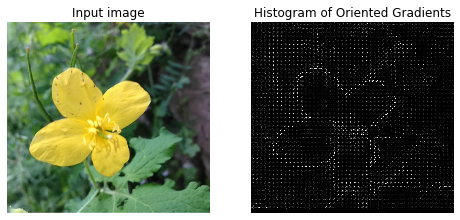

In [17]:
# Example
image = io.imread(folder + 'train' +os.sep +'1321.jpg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [18]:
def to_hog(filename):
    image = io.imread(filename)
    fd = hog(image, orientations=8, pixels_per_cell=(10, 10),
             cells_per_block=(1, 1), multichannel=True, feature_vector=True)
    return fd

In [19]:
loadpath = folder + 'resized' +os.sep + subset + os.sep
features = Parallel(n_jobs=threads)(delayed(to_hog)(loadpath + str(i) + '.jpg') for i in df['mediaid'])

In [20]:
pd.DataFrame(features).to_csv(loadpath + subset + "_hog.csv", index=False)